In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df['variety'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

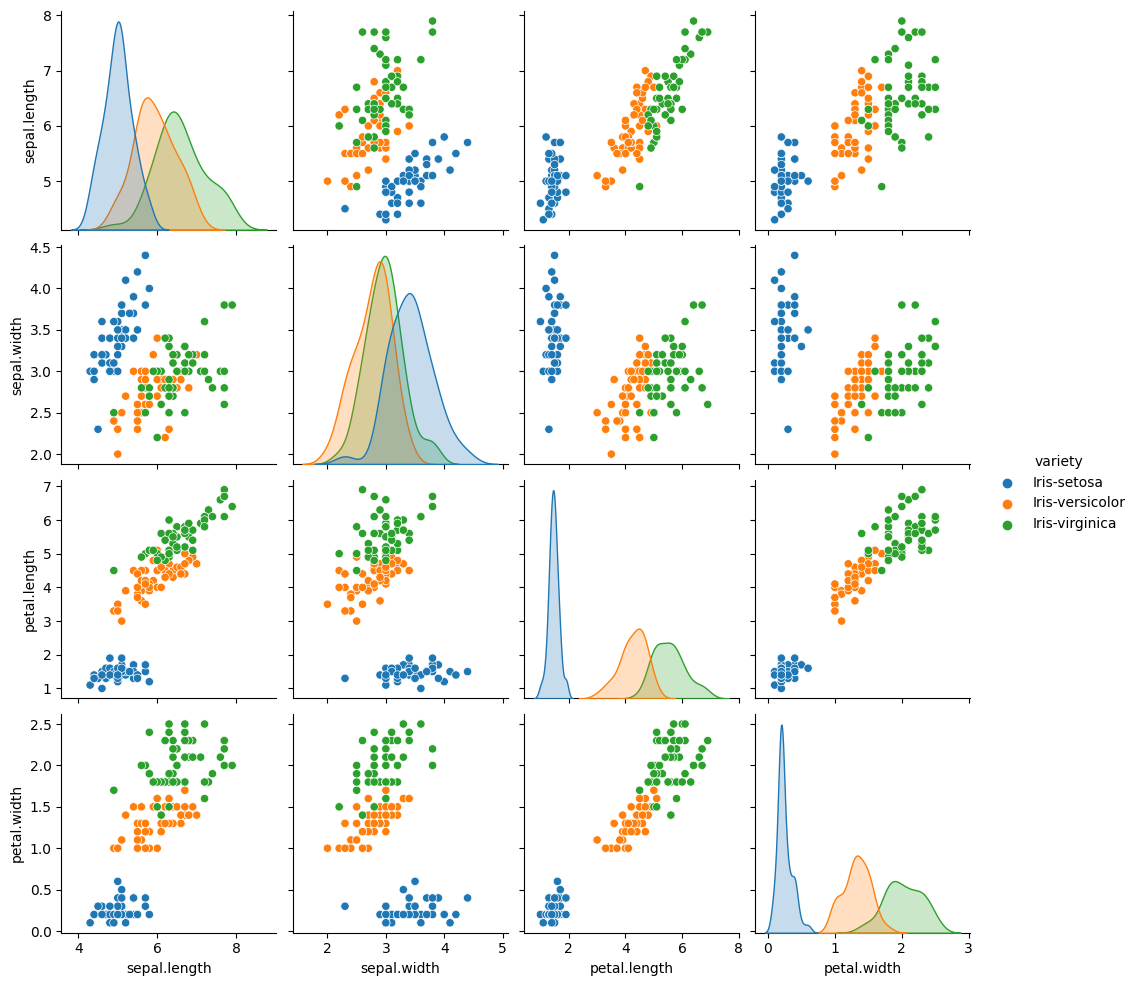

In [17]:
sns.pairplot(df,hue='variety')

In [20]:
corr = df.corr()
corr

<ipython-input-20-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

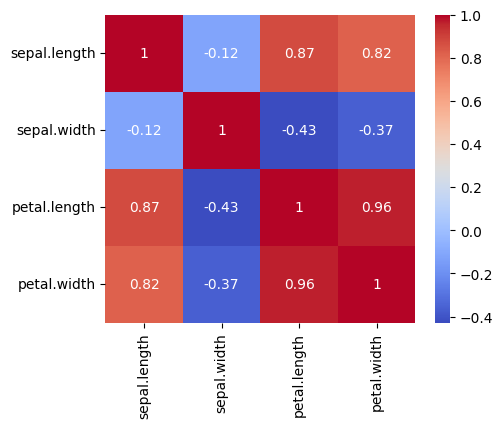

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [22]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [24]:
df['variety'] = Le.fit_transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
x = df.drop(columns = ['variety'])
y = df['variety']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [29]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [30]:
LR.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_predict_train = LR.predict(x_train)
y_predict_train

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1,
       0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 2, 0])

In [32]:
from sklearn.metrics import accuracy_score

In [35]:
print("Training Accuracy=",accuracy_score(y_train,y_predict_train)*100)

Training Accuracy= 96.66666666666667


In [36]:
y_predict_test = LR.predict(x_test)
print("Test Accuracy=",accuracy_score(y_predict_test,y_test)*100)

Test Accuracy= 93.33333333333333


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_predict_test,y_test)
print("Confusion Matrix :\n",cm)

Confusion Matrix :
 [[ 9  0  0]
 [ 0  9  2]
 [ 0  0 10]]


In [40]:
acc_score_train = accuracy_score(y_train,y_predict_train)
print("Accuracy Score for training data:",acc_score_train)

Accuracy Score for training data: 0.9666666666666667


In [41]:
acc_score_test = accuracy_score(y_test,y_predict_test)
print("Accuracy Score for testing data:",acc_score_test)

Accuracy Score for testing data: 0.9333333333333333


In [43]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
new_data = np.array([[2,4,1,6],[5.3,2,6.0,1.9],[4,3.2,3.8,1.1]])
prediction=LR.predict(new_data)
print("Prediction of Iris Flower:{}".format(prediction))

Prediction of Iris Flower:[0 2 1]
